#### 1 导入一些需要的库函数和自定义的函数

In [1]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import os.path as osp

import _init_paths
from utils.detect_face import detect_face
from utils.detect_face import detect_max_face
from utils.test_utils import build_model
from utils.test_utils import detect_landmark

##### 一些工具函数

In [2]:
# 画人脸特征点
def draw_point(img, points, boxs=None, save_path=None):
    if isinstance(img, str):
        img = cv2.imread(img)[..., ::-1]
    img = img.copy()
    for point in points:
        for p in point:
            cv2.circle(img, (int(p[0]), int(p[1])), 2, (0, 0, 255), -1)
    if boxs:
        for box in boxs:
            x1, y1, x2, y2 = list(map(int, box))
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    if save_path:
        cv2.imwrite(save_path, img[..., ::-1])
    return img

# 画人脸矩形框
def draw_box(img, boxs, save_path=None):
    if isinstance(img, str):
        img = cv2.imread(img)[..., ::-1]
    img = img.copy()
    for box in boxs:
        x1, y1, x2, y2 = list(map(int, box))
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    if save_path:
        cv2.imwrite(save_path, img[..., ::-1])
    return img

#### 2 输入图像，检测人脸，得到人脸矩形框

In [3]:
img_path = 'boys.png'
boxs, _ = detect_face(img_path, detector='fan', infer_box=True, device=torch.device('cpu'))
for i, box in enumerate(boxs):
    print(i, box)

0 [268.05 190.2  441.95 360.8 ]
1 [120.   119.05 229.   226.95]
2 [ 19.05  85.5  104.95 161.5 ]


#### 3 人脸矩形框可视化

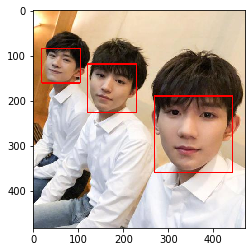

In [4]:
img = draw_box(img_path, boxs)
plt.imshow(img)
plt.show()

##### 抠图，显示人脸区域图像块

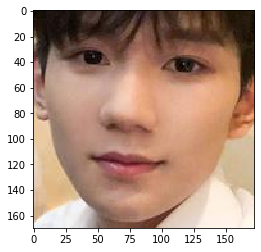

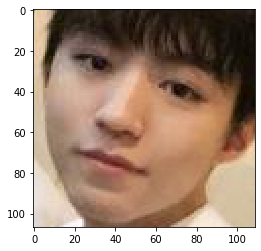

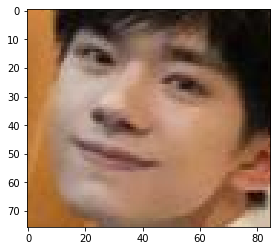

In [5]:
img = cv2.imread(img_path)[..., ::-1]

for i in range(len(boxs)):
    box = list(map(int, boxs[i]))
    crop = img[box[1]:box[3], box[0]:box[2]]
    plt.imshow(crop)
    plt.show()

#### 4 输入图像和人脸矩形框（相当于输入图像的人脸区域部分），检测人脸特征点

In [6]:
model = build_model(device=torch.device('cpu'))
preds = detect_landmark(model, img_path, boxs, save_txt=False, device=torch.device('cpu'), FLIP_TEST=False)

#### 5 人脸特征点可视化

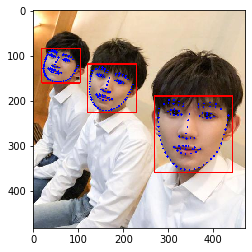

In [7]:
img = draw_point(img_path, preds, boxs=boxs)
plt.imshow(img)
plt.show()